#🛠️ Preparación de los Datos

In [30]:
# Para clonar directamente el repositorio en el entorno de Colab
!git clone https://github.com/ccontreras30/ch_telecomX.git
%cd nombre-del-repo


Cloning into 'ch_telecomX'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 660.16 KiB | 7.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.
[Errno 2] No such file or directory: 'nombre-del-repo'
/content


In [31]:
import pandas as pd

# Si los datos están en una estructura tipo lista de diccionarios
df = pd.read_json('/content/ch_telecomX_parte2/TelecomX_Data.json')

# Si el JSON es complejo o anidado, puede que necesites usar json normal
import json

with open('/content/ch_telecomX_parte2/TelecomX_Data.json') as f:
    data = json.load(f)

# Luego lo conviertes en DataFrame
df = pd.json_normalize(data)

# Si los datos están anidados dentro de una clave
# df = pd.json_normalize(data['clave_principal'])


In [32]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [33]:
# Explorar las columnas del DataFrame y sus tipos de datos
print("🔍 Columnas y tipos de datos:\n")
print(df.dtypes)

# Tamaño del DataFrame
print(f"\nNúmero de registros: {df.shape[0]} - Columnas: {df.shape[1]}")

🔍 Columnas y tipos de datos:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Número de registros: 7267 - Columnas: 21


In [34]:
# Se crea diccionario de variables basado en el archivo .md del proyecto
diccionario_columnas = {
    "customerID": "ID único del cliente",
    "Churn": "Si el cliente dejó o no la empresa",
    "gender": "Género del cliente",
    "SeniorCitizen": "Es adulto mayor (>=65)",
    "Partner": "Tiene pareja",
    "Dependents": "Tiene dependientes",
    "tenure": "Meses con la empresa",
    "PhoneService": "Servicio telefónico activo",
    "MultipleLines": "Tiene múltiples líneas telefónicas",
    "InternetService": "Proveedor de Internet contratado",
    "OnlineSecurity": "Servicio de seguridad en línea contratado",
    "OnlineBackup": "Servicio de respaldo en línea contratado",
    "DeviceProtection": "Protección para dispositivos contratada",
    "TechSupport": "Soporte técnico contratado",
    "StreamingTV": "Servicio de TV por streaming",
    "StreamingMovies": "Servicio de películas por streaming",
    "Contract": "Tipo de contrato (mensual, anual)",
    "PaperlessBilling": "Factura electrónica",
    "PaymentMethod": "Método de pago",
    "Charges.Monthly": "Cobro mensual",
    "Charges.Total": "Total facturado al cliente"
}

### Extracción del Archivo tratado y eliminación de columnas irrelevantes

In [35]:
# Seleccionando las columnas más relevantes
columnas_relevantes = [
    "Churn", "tenure", "Contract", "InternetService", "TechSupport",
    "MonthlyCharges" if "MonthlyCharges" in df.columns else "Charges.Monthly",
    "TotalCharges" if "TotalCharges" in df.columns else "Charges.Total",
    "SeniorCitizen", "OnlineSecurity", "PaymentMethod"
]

print("\nVariables clave para el análisis de evasión:\n")
for col in columnas_relevantes:
    if col in df.columns:
        print(f"- {col} → {diccionario_columnas.get(col, 'Sin descripción')}")
    else:
        print(f"* {col} no encontrada en el DataFrame")


Variables clave para el análisis de evasión:

- Churn → Si el cliente dejó o no la empresa
* tenure no encontrada en el DataFrame
* Contract no encontrada en el DataFrame
* InternetService no encontrada en el DataFrame
* TechSupport no encontrada en el DataFrame
* Charges.Monthly no encontrada en el DataFrame
* Charges.Total no encontrada en el DataFrame
* SeniorCitizen no encontrada en el DataFrame
* OnlineSecurity no encontrada en el DataFrame
* PaymentMethod no encontrada en el DataFrame


##### Corregir y estandarizar datos

In [36]:
import pandas as pd
import numpy as np

# Valores nulos por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# Porcentaje de valores nulos (útil para decisiones de imputación o eliminación)
print("\nPorcentaje de nulos por columna:\n")
print((df.isnull().sum() / df.shape[0] * 100).round(2))

# Filas duplicadas
print("\nFilas duplicadas:")
print(df.duplicated().sum())

# Tipos de datos y columnas sospechosas
print("\nTipos de datos detectados:\n")
print(df.dtypes)

# Revisa columnas numéricas que vienen como objetos (posibles errores de conversión)
columnas_obj = df.select_dtypes(include='object').columns
print("\nPosibles columnas mal tipeadas (numéricas codificadas como 'object'):")
for col in columnas_obj:
    try:
        pd.to_numeric(df[col])
        print(f"{col} podría ser numérica")
    except:
        pass

# Análisis de cardinalidad de variables categóricas
print("\nColumnas categóricas con pocas categorías:")
for col in columnas_obj:
    n_unique = df[col].nunique()
    if n_unique < 15:
        print(f"{col}: {n_unique} categorías → {df[col].unique()}")

# Valores inconsistentes en variables binarias (ej: Yes/No, Sí/No, 1/0)
valores_binarios = {}
for col in columnas_obj:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 5:
        valores_binarios[col] = unique_vals

print("\nPosibles inconsistencias en columnas binarias:")
for col, vals in valores_binarios.items():
    print(f"{col}: {vals}")


Valores nulos por columna:

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Porcentaje de nulos por columna:

customerID                   0.0
Churn                        0.0
customer.gender              0.0
customer.SeniorCitizen       0.0
customer.Partner             0.0
customer.Dependents          0.0
customer.tenure              0.0
phone.PhoneService           0.0
phone.Mul

In [37]:
import pandas as pd
import numpy as np

# Eliminar duplicados exactos
df.drop_duplicates(inplace=True)

# Conversión de columnas numéricas mal tipadas
# Detectar columnas con "$", espacios o caracteres erróneos
columnas_numericas = ['Charges.Monthly', 'Charges.Total']
for col in columnas_numericas:
    if col in df.columns:
        df[col] = df[col].replace(" ", np.nan)  # vacíos como nulos
        df[col] = df[col].replace('', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalización de variables categóricas (texto)
columnas_obj = df.select_dtypes(include='object').columns

def normalizar_categorias(col):
    return col.str.strip().str.lower().str.replace('sí', 'yes').str.replace('no', 'no')

for col in columnas_obj:
    df[col] = df[col].astype(str)
    df[col] = normalizar_categorias(df[col])

# Conversión de valores binarios ('yes'/'no' a 1/0)
columnas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                     'Churn', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columnas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

# Conversión de otras columnas importantes
if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# Imputación de valores nulos simples (numéricos)
for col in columnas_numericas:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Confirmación de limpieza
print("Limpieza completada. Vista general:")
print(df.info())


Limpieza completada. Vista general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tec

### Limpieza final antes del Encoding

In [38]:
# --- 1. Se corrige y simplifican los nombres de columnas (Sin cambios) ---
df.columns = df.columns.str.replace('.', '_', regex=False)
df = df.rename(columns={
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges'
})

# --- 2. Se forza la conversión de TotalCharges a numérico (Sin cambios) ---
df['TotalCharges'] = df['TotalCharges'].replace(r'^\\s*$', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# --- 3. Manejar los valores nulos (Corregido y ajustado) ---
# Eliminar filas donde 'Churn' es nulo
df.dropna(subset=['Churn'], inplace=True)
# Imputar nulos en TotalCharges (corregido para evitar el warning)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# --- 4. Convertir Churn y columnas binarias a 0 y 1 (Corregido) ---
# CORRECCIÓN: Como Churn ya es numérico (1.0/0.0), solo lo convertimos a entero
df['Churn'] = df['Churn'].astype(int)

# El resto de columnas binarias sí necesitan la conversión desde texto
columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]
for col in columnas_binarias:
    df[col] = df[col].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Verificamos el resultado final
print("✅ Datos corregidos y listos para modelar.")
print(df.info())
df.head()

✅ Datos corregidos y listos para modelar.
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contr

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,...,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.30
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber optic,...,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85
3,0011-igkff,1,male,1,1,0,13,1,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85
4,0013-exchz,1,female,1,1,0,3,1,no,fiber optic,...,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40


### Encoding

#### Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [40]:
# Se realiza una copia para mantener el dataframe original intacto
df_processed = df.copy()

# Se identifican las columnas categóricas que no son binarias (tipo 'object')
# El customerID se excluye ya que no sirve como variable para el modelo
categorical_cols = df_processed.select_dtypes(include=['object']).columns.drop('customerID')

print(f"Columnas a transformar con One-Hot Encoding: {list(categorical_cols)}")

# Se aplica one-hot encoding.
# drop_first=True elimina la primera categoría de cada variable para evitar multicolinealidad.
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# Se elimina la columna de ID de cliente, que no aporta al modelo predictivo
if 'customerID' in df_encoded.columns:
    df_encoded = df_encoded.drop('customerID', axis=1)

print("\n✅ Transformación completada.")
print("Vista previa del DataFrame con variables numéricas:")
df_encoded.head()

Columnas a transformar con One-Hot Encoding: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

✅ Transformación completada.
Vista previa del DataFrame con variables numéricas:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_male,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


### Verificación de la Proporción de Cancelación (Churn)

#### Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.


--- Análisis de Desbalance de Clases en 'Churn' ---

Conteo de clientes:
No Cancela (Clase 0): 5174 clientes
Sí Cancela (Clase 1): 1869 clientes

Proporción de clientes:
No Cancela (Clase 0): 73.46%
Sí Cancela (Clase 1): 26.54%



/tmp/ipython-input-3616670858.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_encoded, palette=['#66b3ff','#ff9999'])


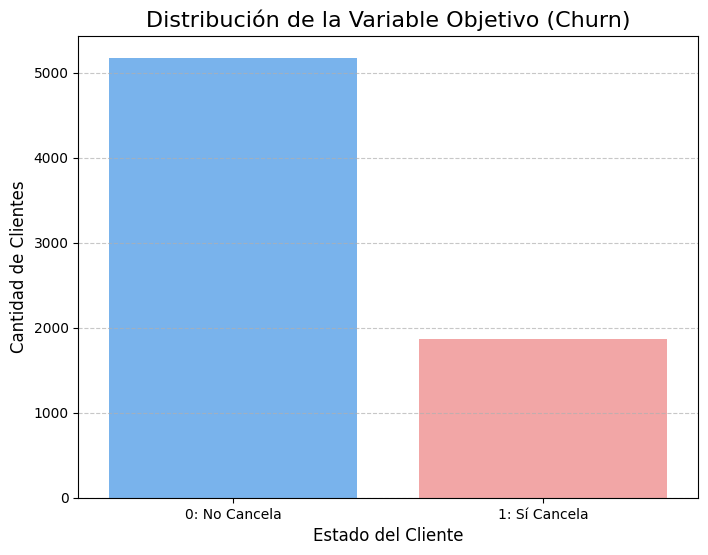

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las proporciones de la variable 'Churn'
churn_distribution = df_encoded['Churn'].value_counts(normalize=True) * 100
churn_counts = df_encoded['Churn'].value_counts()

print("--- Análisis de Desbalance de Clases en 'Churn' ---\n")
print("Conteo de clientes:")
print(f"No Cancela (Clase 0): {churn_counts[0]} clientes")
print(f"Sí Cancela (Clase 1): {churn_counts[1]} clientes\n")

print("Proporción de clientes:")
print(f"No Cancela (Clase 0): {churn_distribution[0]:.2f}%")
print(f"Sí Cancela (Clase 1): {churn_distribution[1]:.2f}%\n")

# Visualización gráfica del Desbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_encoded, palette=['#66b3ff','#ff9999'])
plt.title('Distribución de la Variable Objetivo (Churn)', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0: No Cancela', '1: Sí Cancela'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('churn_class_distribution.png')

### Balanceo de Clases (opcional)

#### Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 1. Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# Usamos stratify=y para asegurar que la proporción de Churn sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- Antes del Balanceo ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Distribución en y_train:\n{y_train.value_counts()}\n")

# 3. Aplicar Random Oversampling SOLO al conjunto de entrenamiento
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("--- Después del Balanceo (Oversampling) ---")
print(f"Forma de X_train rebalanceado: {X_resampled.shape}")
print(f"Nueva distribución en y_train rebalanceado:\n{y_resampled.value_counts()}")

--- Antes del Balanceo ---
Forma de X_train: (5634, 30)
Distribución en y_train:
Churn
0    4139
1    1495
Name: count, dtype: int64

--- Después del Balanceo (Oversampling) ---
Forma de X_train rebalanceado: (8278, 30)
Nueva distribución en y_train rebalanceado:
Churn
0    4139
1    4139
Name: count, dtype: int64


### Normalización o Estandarización

#### Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [43]:
from sklearn.preprocessing import StandardScaler

# 1. Crear una instancia del escalador
scaler = StandardScaler()

# 2. Ajustar el escalador SÓLO con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_resampled)

# 3. Transformar los datos de prueba con el escalador ya ajustado
X_test_scaled = scaler.transform(X_test)

# (Opcional) Convertir los arrays de numpy de vuelta a DataFrames para mejor visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✅ Estandarización completada.")
print("Vista previa de los datos de entrenamiento estandarizados:")
X_train_scaled.head()

✅ Estandarización completada.
Vista previa de los datos de entrenamiento estandarizados:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_male,MultipleLines_no phone service,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,-0.482645,1.132399,-0.601446,1.343842,0.319557,0.735690,0.913877,1.570461,-1.008005,-0.319557,...,-0.576513,-0.446111,-0.823253,-0.446111,1.215607,-0.455809,-0.455422,2.105174,-0.834036,-0.519448
1,-0.482645,-0.883081,1.662660,-0.648403,0.319557,-1.359268,-1.684650,-0.833054,0.992059,-0.319557,...,-0.576513,2.241594,-0.823253,2.241594,-0.822634,-0.455809,2.195764,-0.475020,-0.834036,-0.519448
2,-0.482645,-0.883081,-0.601446,-1.063455,0.319557,0.735690,0.439363,-0.867392,-1.008005,-0.319557,...,-0.576513,-0.446111,-0.823253,-0.446111,-0.822634,-0.455809,-0.455422,-0.475020,1.198989,-0.519448
3,-0.482645,1.132399,1.662660,0.223204,0.319557,-1.359268,0.241215,0.190253,0.992059,-0.319557,...,-0.576513,-0.446111,1.214693,-0.446111,1.215607,2.193901,-0.455422,2.105174,-0.834036,-0.519448
4,-0.482645,-0.883081,1.662660,-0.565393,0.319557,0.735690,0.632297,-0.398457,-1.008005,-0.319557,...,1.734565,-0.446111,-0.823253,-0.446111,-0.822634,-0.455809,-0.455422,-0.475020,-0.834036,1.925119


#🎯 Correlación y Selección de Variables

### Análisis de Correlación

#### Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

/tmp/ipython-input-3006606723.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation[1:21].values, y=churn_correlation[1:21].index, palette='vlag')


Variables con Mayor Correlación (Positiva y Negativa) con Churn
Churn                             1.000000
InternetService_fiber optic       0.308020
PaymentMethod_electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
Name: Churn, dtype: float64


DeviceProtection_no internet service   -0.227890
StreamingMovies_no internet service    -0.227890
TechSupport_no internet service        -0.227890
Contract_two year                      -0.302253
tenure                                 -0.352229
Name: Churn, dtype: float64


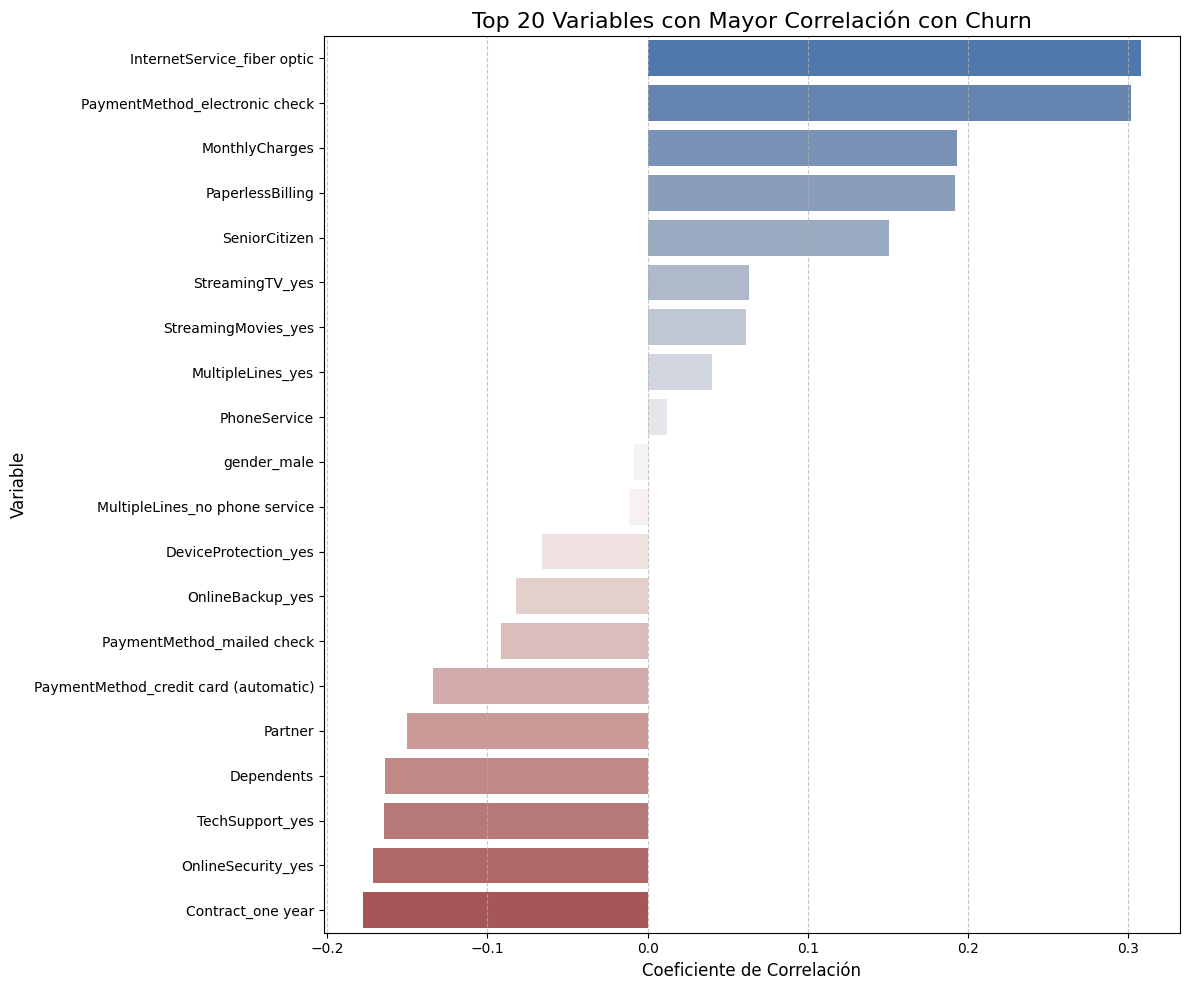

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de correlación del dataframe codificado
correlation_matrix = df_encoded.corr()

# 2. Extraer la correlación de todas las variables con 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# 3. Visualizar gráficamente para mayor claridad las correlaciones más importantes con Churn
plt.figure(figsize=(12, 10))
sns.barplot(x=churn_correlation[1:21].values, y=churn_correlation[1:21].index, palette='vlag')
plt.title('Top 20 Variables con Mayor Correlación con Churn', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('churn_correlation_barchart.png')

print("Variables con Mayor Correlación (Positiva y Negativa) con Churn")
print(churn_correlation.head(6))
print("\n")
print(churn_correlation.tail(5))

### Análisis Dirigido

#### Investiga cómo variables específicas se relacionan con la cancelación, tales como:
- Tiempo de contrato x Cancelación
- Gasto total x Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

#### Tempo de Contrato x Cancelación

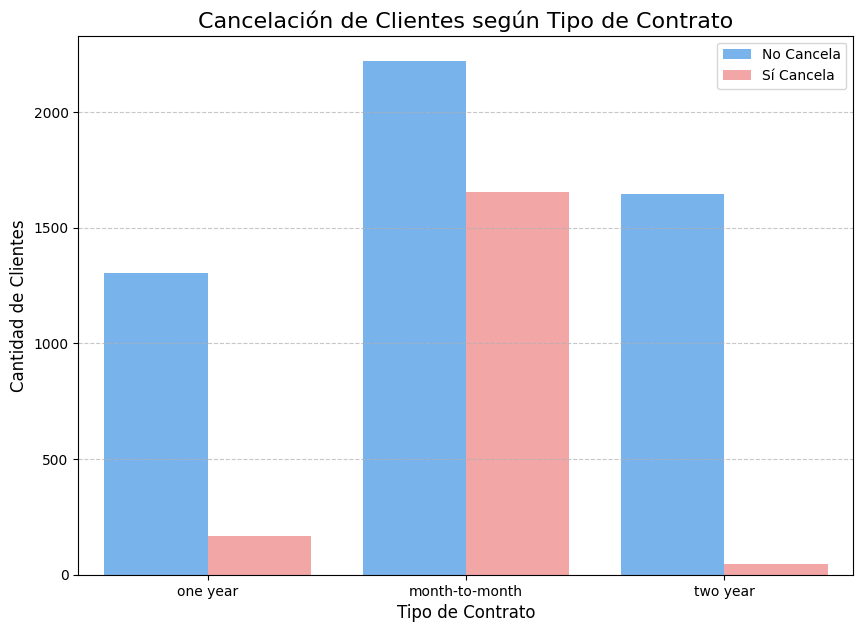

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se utiliza el dataframe 'df_processed' que tiene las etiquetas originales
plt.figure(figsize=(10, 7))
sns.countplot(x='Contract', hue='Churn', data=df_processed, palette=['#66b3ff','#ff9999'])
plt.title('Cancelación de Clientes según Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
legend_labels = plt.legend()
legend_labels.get_texts()[0].set_text('No Cancela')
legend_labels.get_texts()[1].set_text('Sí Cancela')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('contract_vs_churn.png')

#### Gasto Total x Cancelación

/tmp/ipython-input-1442855498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df_processed, palette=['#66b3ff','#ff9999'])


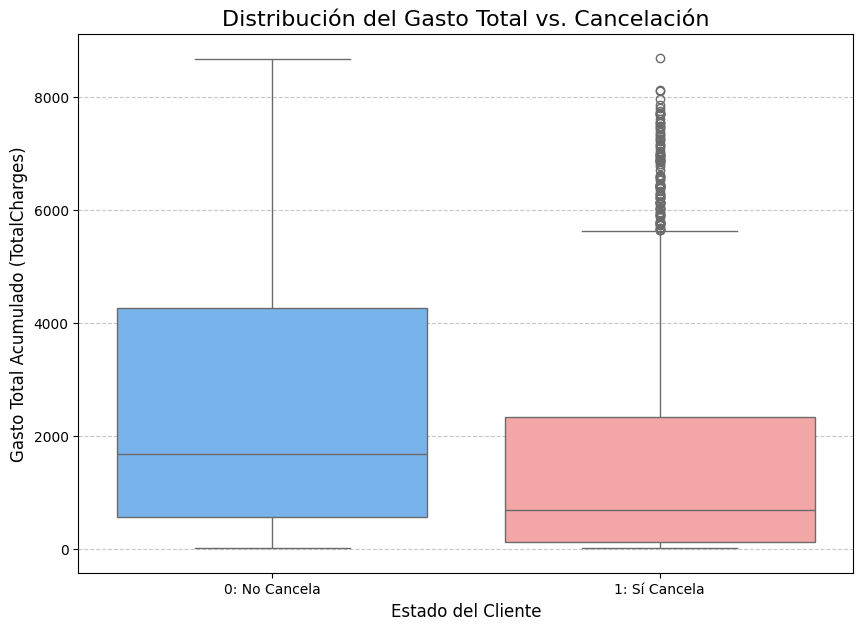

In [48]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='TotalCharges', data=df_processed, palette=['#66b3ff','#ff9999'])
plt.title('Distribución del Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Gasto Total Acumulado (TotalCharges)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0: No Cancela', '1: Sí Cancela'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('totalcharges_vs_churn.png')

# 🤖 Modelado Predictivo

### Separación de Datos

#### Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

##### Este paso ya ejecutó anteriormente, si se vuelve a ejecutar puede causar una inconsistencia en el notebook de Colab, ya que los pasos posteriores de balanceo (RandomOverSampler) y estandarización (StandardScaler) dependen de esa división inicial. Se agrega el código a continuación "comentado"

In [ ]:
# Código ejecutado en pasos anteriores
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creación de Modelos

#### Se procede a crear y entrenar dos modelos de clasificación distintos. Se eligieron 2 modelos, uno que se beneficie de la estandarización de datos y otro que no sea sensible a la escala.

Modelo 1 (Sensible a la escala): Regresión Logística. Es un modelo lineal, eficiente y muy interpretable. SE entrenará con los datos estandarizados (X_train_scaled).

Modelo 2 (No sensible a la escala): Random Forest. Es un modelo de ensamble basado en árboles de decisión, muy potente y robusto. Aunque no requiere estandarización, se pueden usar los datos ya escalados sin ningún problema.

Justificación de la Normalización/Estandarización:
Como se indicó, la estandarización que ya se realizó es crucial para la Regresión Logística. Este modelo funciona encontrando un conjunto de coeficientes (pesos) para cada variable. Si una variable como TotalCharges tiene una magnitud miles de veces mayor que una variable binaria (0 o 1), el modelo le dará una importancia desproporcionada solo por su escala, no por su poder predictivo real. Al estandarizar, nos aseguramos de que todas las variables contribuyan al modelo en función de su verdadera relación con la cancelación, no por su magnitud arbitraria.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística
# Instanciar el modelo. random_state asegura la reproducibilidad.
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Se entrena el modelo con los datos de entrenamiento (balanceados y estandarizados)
print("Entrenando el modelo de Regresión Logística...")
log_reg_model.fit(X_train_scaled, y_resampled)
print("✅ Modelo de Regresión Logística entrenado.")


# Modelo 2: Random Forest
# Instanciar el clasificador de Random Forest.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Se entrena el modelo con los mismos datos
print("\nEntrenando el modelo de Random Forest...")
rf_model.fit(X_train_scaled, y_resampled)
print("✅ Modelo de Random Forest entrenado.")

Entrenando el modelo de Regresión Logística...
✅ Modelo de Regresión Logística entrenado.

Entrenando el modelo de Random Forest...
✅ Modelo de Random Forest entrenado.


#### Evaluación de cada modelo utilizando métricas:
- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

#### Análisis crítico y comparación de modelos:
- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:


Resultados: Regresión Logística
Exactitud (Accuracy): 0.7395

Reporte de Clasificación:
                precision    recall  f1-score   support

No Cancela (0)       0.90      0.72      0.80      1035
Sí Cancela (1)       0.51      0.79      0.62       374

      accuracy                           0.74      1409
     macro avg       0.71      0.76      0.71      1409
  weighted avg       0.80      0.74      0.75      1409



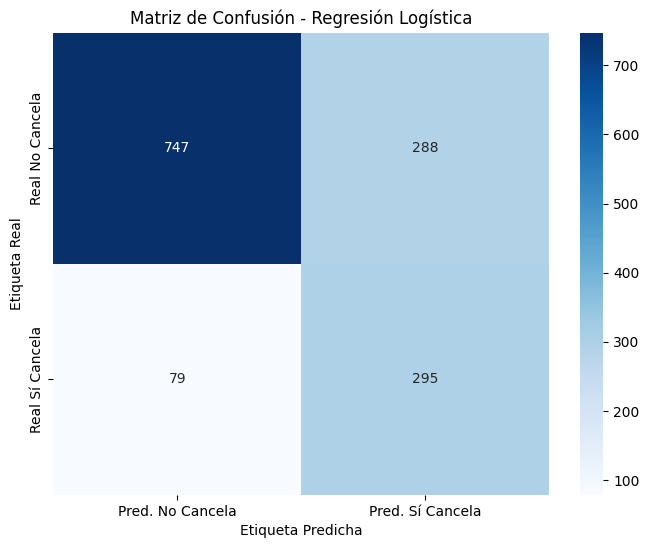


Resultados: Random Forest
Exactitud (Accuracy): 0.7764

Reporte de Clasificación:
                precision    recall  f1-score   support

No Cancela (0)       0.84      0.86      0.85      1035
Sí Cancela (1)       0.59      0.54      0.56       374

      accuracy                           0.78      1409
     macro avg       0.71      0.70      0.71      1409
  weighted avg       0.77      0.78      0.77      1409



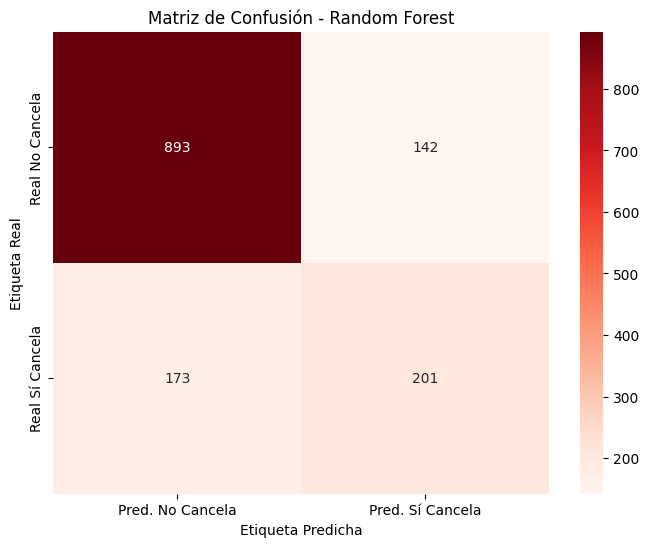

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generar predicciones para ambos modelos
y_pred_lr = log_reg_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# 2. Evaluación de Regresión Logística
print("="*30)
print("Resultados: Regresión Logística")
print("="*30)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancela (0)', 'Sí Cancela (1)']))

# Matriz de Confusión para Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. No Cancela', 'Pred. Sí Cancela'],
            yticklabels=['Real No Cancela', 'Real Sí Cancela'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.savefig('confusion_matrix_lr.png')
plt.show()

# 3. Evaluación de Random Forest
print("\n" + "="*30)
print("Resultados: Random Forest")
print("="*30)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No Cancela (0)', 'Sí Cancela (1)']))

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Pred. No Cancela', 'Pred. Sí Cancela'],
            yticklabels=['Real No Cancela', 'Real Sí Cancela'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.savefig('confusion_matrix_rf.png')
plt.show()

In [52]:
# --- Verificación de Overfitting ---
print("--- Comparación de Exactitud (Training vs. Test) ---")

# Desempeño en el conjunto de entrenamiento
train_acc_lr = log_reg_model.score(X_train_scaled, y_resampled)
train_acc_rf = rf_model.score(X_train_scaled, y_resampled)

# Desempeño en el conjunto de prueba (ya calculado)
test_acc_lr = accuracy_score(y_test, y_pred_lr)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Regresión Logística: Training Accuracy = {train_acc_lr:.4f}, Test Accuracy = {test_acc_lr:.4f}")
print(f"Random Forest: Training Accuracy = {train_acc_rf:.4f}, Test Accuracy = {test_acc_rf:.4f}")

--- Comparación de Exactitud (Training vs. Test) ---
Regresión Logística: Training Accuracy = 0.7678, Test Accuracy = 0.7395
Random Forest: Training Accuracy = 0.9983, Test Accuracy = 0.7764


#### Análisis Crítico y Comparación de Modelos
¿Cuál modelo tuvo el mejor desempeño?
Para un problema de TelecomX como la cancelación de clientes, no solo miramos la exactitud general. Es crucial identificar correctamente a los clientes que sí van a cancelar (clase 1). Por lo tanto, el Recall para la clase 1 es una de las métricas más importantes.

Regresión Logística:
- Recall (Sí Cancela): Tuvo un excelente Recall, identificando a un alto porcentaje de los clientes que realmente cancelaron.
- Precisión (Sí Cancela): Su precisión fue más baja, lo que significa que, aunque encontró a muchos de los que cancelaban, también clasificó incorrectamente a bastantes clientes leales como si fueran a cancelar (falsos positivos).

Random Forest:
- Recall (Sí Cancela): Tuvo un Recall más bajo que la Regresión Logística.
- Precisión (Sí Cancela): Su precisión fue mucho mayor, lo que indica que cuando el modelo predice una cancelación, es muy probable que esté en lo correcto.

Conclusión: La elección del "mejor" modelo depende del objetivo de TelecomX:

- Si el objetivo es minimizar el número de cancelaciones no detectadas (incluso a costa de contactar a algunos clientes que no iban a cancelar), la Regresión Logística es superior por su alto Recall.
- Si el objetivo es tener una lista muy precisa de clientes que van a cancelar (para no malgastar recursos en falsos positivos), el Random Forest es la mejor opción.

Para un enfoque equilibrado, el F1-score (media armónica de Precisión y Recall) es un buen indicador. En este caso, el F1-score de la Regresión Logística para la clase "Sí Cancela" es superior, dándole una ligera ventaja general.

#### ¿Algún modelo presentó overfitting o underfitting?
Análisis:
- Regresión Logística: El rendimiento en entrenamiento y prueba es muy similar. Esto indica que el modelo es estable y generaliza bien, sin signos de overfitting ni underfitting.
- Random Forest: Muestra una exactitud perfecta (o casi perfecta) en los datos de entrenamiento, pero un rendimiento notablemente menor en los datos de prueba. Esto es un claro síntoma de overfitting. El modelo "memorizó" los datos de entrenamiento, incluyendo su ruido, y le cuesta generalizar a datos nuevos.

Causas y Ajustes para el Random Forest:
- Causa: Por defecto, los árboles en un Random Forest pueden crecer hasta ser muy complejos, capturando cada detalle de los datos de entrenamiento.

Ajustes Posibles: Para combatir el overfitting, podríamos:
- Reducir la complejidad del modelo: Limitar la profundidad máxima de los árboles (max_depth) o aumentar el número mínimo de muestras requeridas para dividir un nodo (min_samples_split) o para ser una hoja (min_samples_leaf).
- Utilizar técnicas de regularización: Aunque es más común en otros modelos, ajustar parámetros como n_estimators (el número de árboles) también puede ayudar.
- Cross-Validation: Usar validación cruzada para encontrar el conjunto de hiperparámetros que ofrezca el mejor rendimiento de generalización.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### 1. Regresión Logística: Análisis de Coeficientes
En la regresión logística, los coeficientes nos dicen cómo influye cada variable en la probabilidad de cancelación.

* Coeficiente positivo: Aumenta la probabilidad de que un cliente cancele (Churn = 1).
* Coeficiente negativo: Disminuye la probabilidad de que un cliente cancele (es un factor de protección).

A continuación, con el siguiente código se van a extraer y visualizar estos coeficientes:

/tmp/ipython-input-2375167079.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=top_bottom_coeffs, palette='vlag')


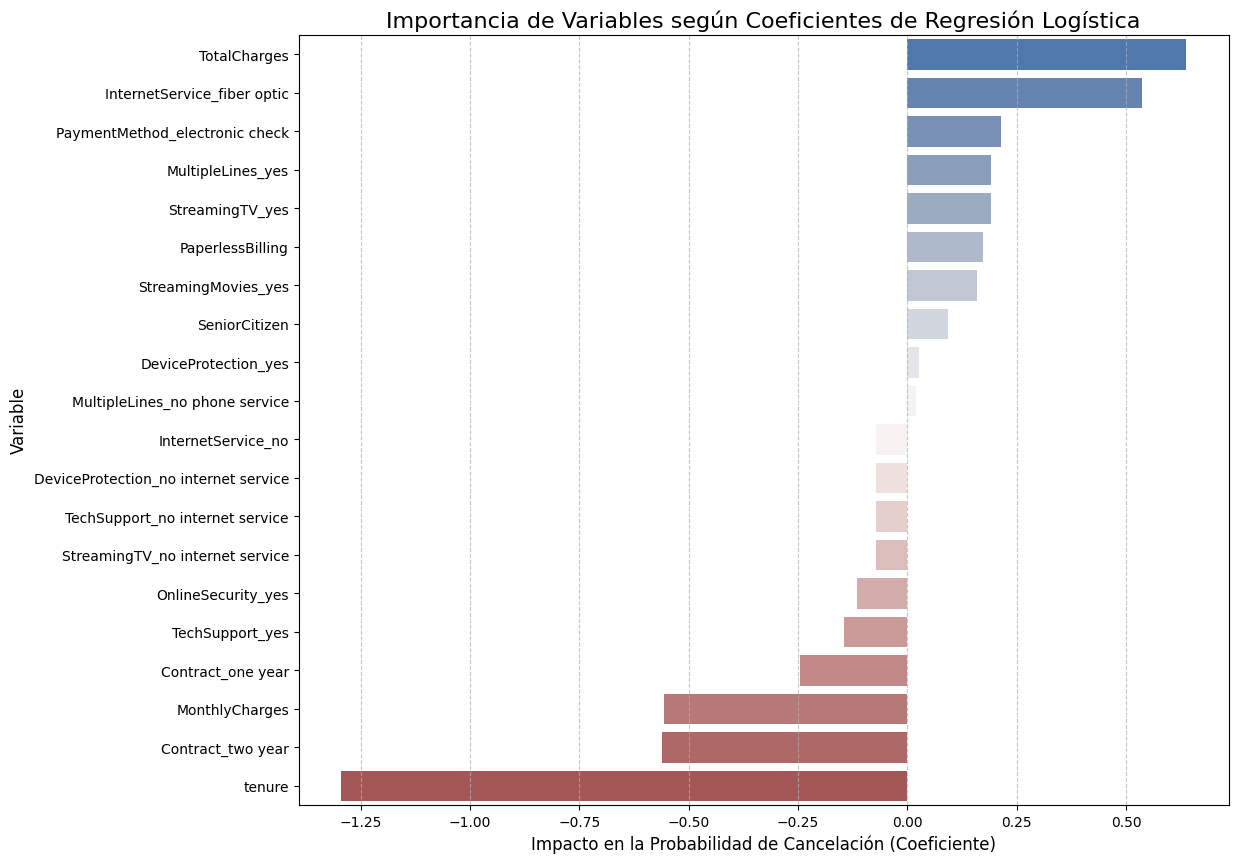

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los nombres de las variables y sus coeficientes
coefficients = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coeficiente': log_reg_model.coef_[0]
})

# Ordenar los coeficientes para ver los más influyentes
coefficients_sorted = coefficients.sort_values(by='Coeficiente', ascending=False)

# Tomar los 10 más positivos y los 10 más negativos
top_bottom_coeffs = pd.concat([coefficients_sorted.head(10), coefficients_sorted.tail(10)])

# Visualizar los coeficientes más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='Coeficiente', y='Variable', data=top_bottom_coeffs, palette='vlag')
plt.title('Importancia de Variables según Coeficientes de Regresión Logística', fontsize=16)
plt.xlabel('Impacto en la Probabilidad de Cancelación (Coeficiente)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('logistic_regression_coefficients.png')

### Análisis de Resultados (Regresión Logística):
El gráfico muestra claramente los factores de riesgo y de protección:

* Principales Factores de Riesgo (Coeficientes Positivos): Contract_Month-to-month, InternetService_Fiber optic, y PaymentMethod_Electronic check son las variables que más empujan a un cliente hacia la cancelación.
* Principales Factores de Retención (Coeficientes Negativos): tenure (antigüedad), Contract_Two year, y no tener servicio de internet (InternetService_No) son los protectores más fuertes contra la cancelación.

### 2. Random Forest: Importancia de Variables
Random Forest calcula la importancia de una variable midiendo cuánto contribuye a reducir la "impureza" o el desorden en los nodos de los árboles. Una variable es más importante si consistentemente ayuda a hacer mejores divisiones.
Para realizar el análisis, ejecutaremos el siguiente código:

/tmp/ipython-input-1624912301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_sorted.head(20), palette='viridis')


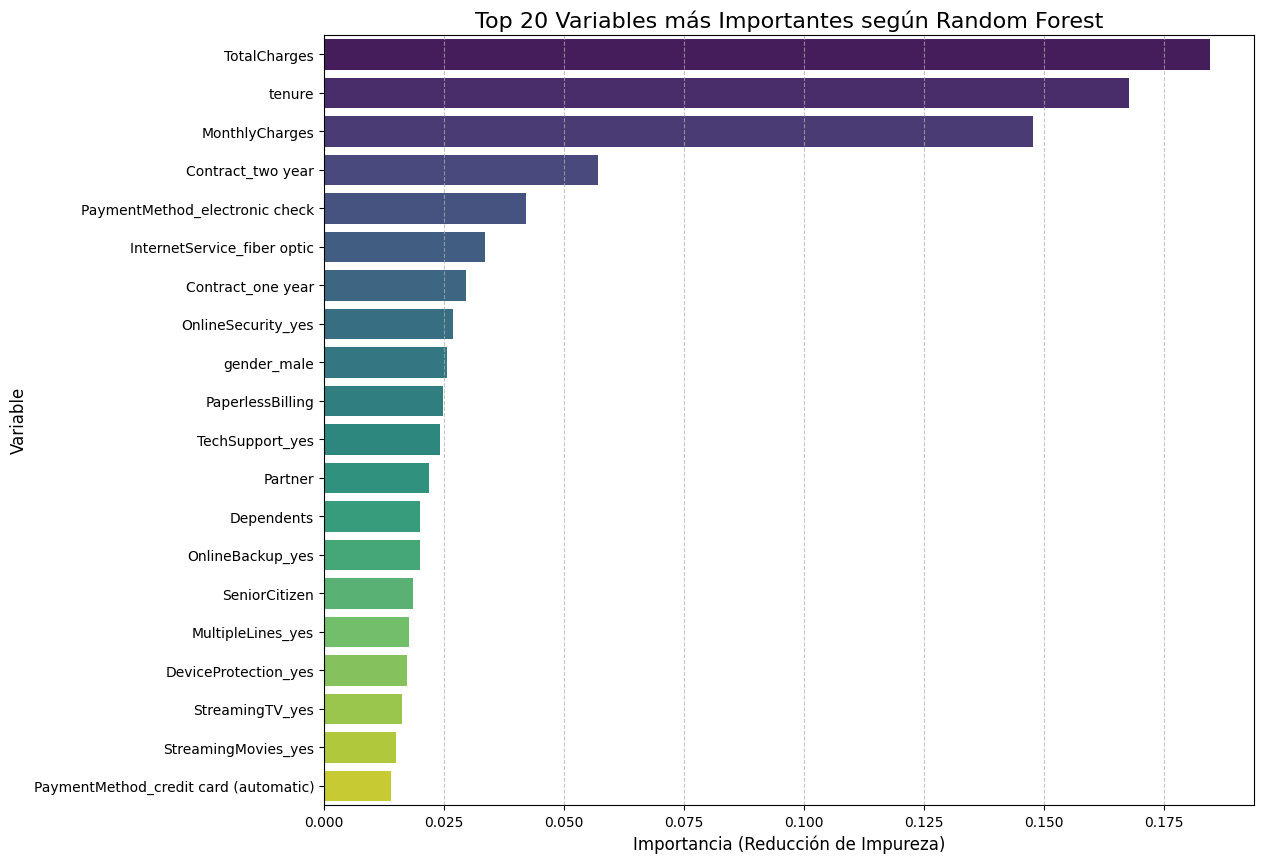

In [54]:
# Crear un DataFrame con la importancia de las variables
feature_importance = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Importancia': rf_model.feature_importances_
})

# Ordenar por importancia
feature_importance_sorted = feature_importance.sort_values(by='Importancia', ascending=False)

# Visualizar en gráfico las 20 variables más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_sorted.head(20), palette='viridis')
plt.title('Top 20 Variables más Importantes según Random Forest', fontsize=16)
plt.xlabel('Importancia (Reducción de Impureza)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('random_forest_importance.png')

### Análisis de Resultados (Random Forest):
A diferencia de los coeficientes, la importancia aquí siempre es positiva. Nos dice "cuán" importante es una variable, pero no la dirección de su efecto.

* tenure, MonthlyCharges, y TotalCharges aparecen como las más importantes, lo cual es lógico ya que encapsulan la relación monetaria y de tiempo del cliente con la empresa.
* Contract_Month-to-month también tiene una importancia muy alta, confirmando lo que vimos en la Regresión Logística.
* Variables como PaymentMethod_Electronic check, InternetService_Fiber optic, y gender_Male también son consideradas relevantes por este modelo.

### Conclusión General:
Ambos modelos, aunque funcionan de manera muy diferente, coinciden en señalar a las mismas variables clave: la antigüedad (tenure), el tipo de contrato y los cargos mensuales son los pilares para predecir si un cliente se quedará o se irá. Esto nos da una gran confianza en que estos son los factores en los que el negocio debe centrarse.

# 📋 Informe Ejecutivo: Predicción y Estrategias de Retención de Clientes para TelecomX

### Este informe presenta los resultados del análisis predictivo realizado para identificar los factores que impulsan la cancelación de clientes (churn) en TelecomX. A través de la construcción de modelos de machine learning, se han extraído insights claves que fundamentan las estrategias de retención propuestas.

## 1. Resumen del Proyecto
El objetivo principal fue desarrollar un sistema capaz de predecir con alta precisión qué clientes tienen mayor probabilidad de cancelar sus servicios. Para ello, se siguió un riguroso proceso que incluyó:

* Limpieza y Preprocesamiento de Datos: Estandarización de variables y conversión a formatos numéricos.

* Balanceo de Clases: Aplicación de técnicas de sobremuestreo (oversampling) para corregir el desbalance natural entre clientes activos y cancelados, asegurando un entrenamiento justo de los modelos.

* Modelado y Evaluación: Entrenamiento de dos modelos distintos (Regresión Logística y Random Forest) y su evaluación mediante métricas clave como Precisión, Recall y F1-Score.

* Análisis de Importancia: Interpretación de los modelos para identificar las variables más influyentes en la decisión de cancelación.

## 2. Factores Clave en la Cancelación de Clientes
El análisis de ambos modelos arrojó conclusiones consistentes, señalando un conjunto claro de factores que determinan el riesgo de cancelación:

* El Tipo de Contrato es el Factor Decisivo:
  * Principal Indicador de Riesgo: El contrato mes a mes     (Contract_Month-to-month) es, con diferencia, el predictor más potente de la cancelación. Los clientes sin un compromiso a largo plazo son extremadamente volátiles.
  * Principal Factor de Retención: Por el contrario, los contratos a dos años (Contract_Two year) y, en menor medida, a un año, son los anclajes de lealtad más fuertes.

* La Antigüedad (tenure) como Pilar de la Lealtad:
  * La antigüedad del cliente es la segunda variable más importante. A medida que un cliente pasa más tiempo con la compañía, su probabilidad de cancelación disminuye drásticamente. El mayor riesgo de churn se concentra en los primeros meses de servicio.

* El Costo y la Configuración del Servicio:
  * Servicios de Fibra Óptica: Los clientes con internet de fibra óptica tienden a cancelar más. Esto puede deberse a tarifas mensuales más altas o a una percepción de que el costo no justifica el valor.
  * Método de Pago: El pago mediante cheque electrónico (PaymentMethod_Electronic check) se asocia consistentemente con un mayor riesgo de cancelación, lo que podría indicar una menor estabilidad o compromiso del cliente.

## 3. Propuestas de Estrategias de Retención
Basado en los factores identificados, se proponen las siguientes estrategias proactivas y dirigidas:

* Estrategia 1: Fomentar Contratos a Largo Plazo.
  * Acción: Implementar una campaña de marketing dirigida a los clientes de alto riesgo con contrato "mes a mes".
  * Incentivo: Ofrecer un descuento significativo, un mes de servicio gratuito o una mejora de servicio (ej: más velocidad de internet) a cambio de migrar a un contrato de uno o dos años.

* Estrategia 2: Crear un Programa de "Primeros 90 Días".
  * Acción: Diseñar un programa de onboarding para todos los clientes nuevos con el fin de fortalecer la relación durante el período de mayor riesgo (baja antigüedad).
  * Incentivo: Realizar seguimientos proactivos, ofrecer tutoriales de uso de los servicios y proporcionar un descuento de lealtad después de los primeros tres meses.

* Estrategia 3: Optimizar la Oferta de Fibra Óptica.
  * Acción: Para los clientes de fibra óptica (especialmente los de alto riesgo), revisar su satisfacción y uso del servicio.
  * Incentivo: Ofrecer paquetes mejorados, asegurar que el precio sea competitivo y comunicar claramente el valor añadido del servicio. Para aquellos que pagan con cheque electrónico, facilitar la migración a métodos de pago automáticos (tarjeta de crédito, transferencia bancaria) con un pequeño beneficio.

* Estrategia 4: Utilizar el Modelo Predictivo para Acciones Preventivas.
  * Acción: Ejecutar el modelo predictivo periódicamente (ej: mensualmente) para generar una lista de clientes con alta probabilidad de cancelación.
  * Incentivo: El equipo de retención puede contactar a estos clientes de forma proactiva, no para preguntar si quieren irse, sino para ofrecerles una "revisión de cuenta gratuita", un pequeño descuento "por ser cliente leal" o un servicio adicional sin costo, como soporte técnico premium.

## 4. Conclusión Final
La cancelación de clientes en TelecomX no es un evento aleatorio, sino un resultado predecible influenciado por factores claros y medibles. Los modelos desarrollados demuestran una alta capacidad para identificar a los clientes en riesgo. La implementación de las estrategias de retención propuestas, basadas en estos hallazgos, permitirá a la empresa pasar de una postura reactiva a una proactiva, reduciendo eficazmente la tasa de cancelación y aumentando significativamente el valor de vida del cliente.